## Split  Data

In [23]:
# Import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import jieba 
import os

In [2]:
# print current working directory
print(os.getcwd())

C:\Users\User\Desktop\2020_DataPilot\Code


In [4]:
# Change working directory
os.chdir('C:\\Users\\User\\Desktop\\2020_DataPilot\\Data') 
print(os.getcwd())

C:\Users\User\Desktop\2020_DataPilot\Data


In [5]:
# Import data
I_Lan = pd.read_csv('新冠肺炎疫情之社群輿情數據_意藍資訊.csv', encoding = 'utf-8')

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1,3,4,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# 把字串全形轉半形
# https://www.itread01.com/content/1544418568.html
def strQ2B(ustring):
    ss = []
    for s in ustring:
        rstring = ""
        for uchar in s:
            inside_code = ord(uchar)
            if inside_code == 12288:  # 全形空格直接轉換
                inside_code = 32
            elif (inside_code >= 65281 and inside_code <= 65374):  # 全形字元（除空格）根據關係轉化
                inside_code -= 65248
            rstring += chr(inside_code)
        ss.append(rstring)
    return ''.join(ss)

In [7]:
# make Chinese text clean
# https://reurl.cc/7oD8Ok
import re
def clean_zh_text(text):
    # keep only Chinese
    comp = re.compile('[^\u4e00-\u9fa5]')
    return comp.sub('', text)

In [8]:
# 全形轉半形、清除特殊字元
I_Lan['標題'] = I_Lan['標題'].map(lambda x: strQ2B(x))
I_Lan['標題'] = I_Lan['標題'].map(lambda x: clean_zh_text(x))
I_Lan['內容'] = I_Lan['內容'].astype('str')
I_Lan['內容'] = I_Lan['內容'].map(lambda x: strQ2B(x))
I_Lan['內容'] = I_Lan['內容'].map(lambda x: clean_zh_text(x))
I_Lan.head()

,標題,內容,來源,來源網站,發布時間,討論串總則數,作者,情緒標記,原始連結
0,喝點高度白酒曬曬太陽看來有益健康隨身帶點消毒,喝點高度白酒曬曬太陽看來有益健康隨身帶點消毒濕紙巾跟口罩,社群網站,Facebook公開社團 > 韓國瑜穿雲鐵柱後援會,2020/01/23 11:44:00,0.0,J*********,中立,http://www.facebook.com/permalink.php?story_fb...
1,喝點高度白酒曬曬太陽看來有益健康隨身帶點消毒,喝點高度白酒曬曬太陽看來有益健康隨身帶點消毒濕紙巾跟口罩,社群網站,Facebook公開社團 > 爆吱戰堂,2020/01/23 11:46:00,1.0,J*********,中立,http://www.facebook.com/permalink.php?story_fb...
2,知識文懶人包冠狀病毒武漢肺炎中,知識文懶人包冠狀病毒武漢肺炎以下為轉貼文章,社群網站,Facebook公開社團 > 彰化縣民對魏縣長建言交流討論區,2020/01/21 18:56:00,0.0,L*******,負面,http://www.facebook.com/permalink.php?story_fb...
3,武漢肺炎大必知防疫知識何松穎醫師一次解析開啟今健康官網閱讀,以下為轉貼文章武漢肺炎大必知防疫知識何松穎醫師一次解析,社群網站,Facebook粉絲團 > 新聞挖挖哇粉絲團,2020/01/22 20:17:00,2.0,新聞挖挖哇粉絲團,中立,http://www.facebook.com/permalink.php?story_fb...
4,,,社群網站,Facebook粉絲團 > 楊晨熙,2020/01/17 17:11:29,0.0,無作者資訊,中立,http://www.facebook.com/permalink.php?story_fb...


In [9]:
# Split data
I_Lan_Pos = I_Lan.loc[I_Lan['情緒標記'] == '正面']
I_Lan_Neg = I_Lan.loc[I_Lan['情緒標記'] == '負面']
I_Lan_Neu = I_Lan.loc[I_Lan['情緒標記'] == '中立']

In [10]:
# Drop cols
I_Lan_Pos = I_Lan_Pos.drop(['情緒標記','原始連結'], axis = 1)
I_Lan_Neg = I_Lan_Neg.drop(['情緒標記','原始連結'], axis = 1)
I_Lan_Neu = I_Lan_Neu.drop(['情緒標記','原始連結'], axis = 1)

## Text Minig

In [13]:
#默認使用精確模式
import jieba
import jieba.analyse
file_path = 'C:/Users/User/anaconda3/Lib/site-packages/jieba'
file = 'dict.txt'
jieba.set_dictionary(os.path.join(file_path,file))
text = '我來到北京清華大學吃一碗大牛肉麵'
print('預設:', '|'.join(jieba.cut(text, cut_all=False, HMM=True)))
print('全關閉:', '|'.join(jieba.cut(text, cut_all=False, HMM=False)))
print('搜尋引擎:', '|'.join(jieba.cut(text, cut_all=True, HMM=True)))

Building prefix dict from C:\Users\User\anaconda3\Lib\site-packages\jieba\dict.txt ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.u1ca25aedd818051ae4a0fdd649b65b3b.cache
Loading model cost 1.626 seconds.
Prefix dict has been built successfully.


預設: 我來|到|北京|清華大學|吃|一碗|大|牛肉|麵
全關閉: 我|來|到|北京|清|華|大|學|吃|一碗|大|牛肉|麵
搜尋引擎: 我|來|到|北京|清|華|大|學|吃|一碗|大|牛肉|麵


In [14]:
# 增加字典字詞
ADD = ['小兒感染科', '黃瑽寧', '治好', '林俊傑', '第九例', '張建宗', '今早', '新年新希望', '誠實豆沙包','韓市長', '世界衛生組織',\
       '舔中', '針灸', '蔡英文', '疾管局', '人傳人', '打臉文', '小勞勃道尼', '酷碰券', '聖荷西', '陳時中', '瑞德西韋', '衛健委',\
      '李昱叡', '曼尼', '賈伯斯', '自曝', '陳傑憲', '鈴木一朗', '伸卡球','潘孟安', '暖舉', '林之晨', '唐鳳', '新冠肺炎', '解盲',\
      '傅崑萁','王定宇', '韓導', '志村健', '驚蛰', '出生年月日', '酒精', '譚德塞', '問卦', '韓國瑜', '超前部署', '台積電', '潔手露',\
      '亞伯特','台灣', '紅襪隊', '高雄']
for i in ADD:
    jieba.suggest_freq(i,True)

### POS

In [15]:
# I_Lan_Pos
Pos = []
Series = I_Lan_Pos['標題'].map(lambda x: '|'.join(jieba.cut(x, cut_all=False, HMM=True)))
for i in Series:
    Pos.append(i.split('|'))

# Flatten the list
Pos_flat_list = [item for sublist in Pos for item in sublist]

In [16]:
# 去除單字
Pos_flat_list = [i for i in Pos_flat_list if len(i) > 1]

In [17]:
# 減少連接、無義字詞
DEL = ['雖然','怎麼','真的','我們','可以','希望','並非','還將']
Pos_flat_list = [j for i, j in enumerate(Pos_flat_list) if j not in DEL]

In [18]:
# Stats of Pos
from collections import Counter
Pos_count = Counter(Pos_flat_list)
Pos_count = pd.DataFrame.from_dict(Pos_count, orient='index').reset_index().sort_values(by = 0, ascending = False)
Pos_count.to_csv('Pos_count.csv')

In [29]:
# Fix view Chinese problem 
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']    # 指定預設字型:解決plot不能顯示中文問題
mpl.rcParams['axes.unicode_minus'] = False 

Text(0, 0.5, '總字詞數')

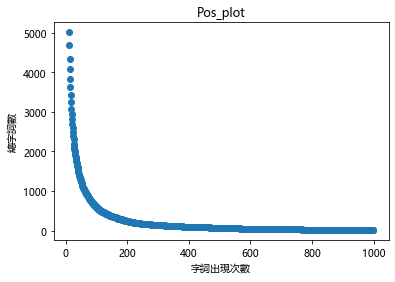

In [31]:
# Plot the key word num
num = []
i_num = []
for i in range(10,1000):
    i_num.append(i)
    num.append(Pos_count.loc[Pos_count[0] >i].shape[0])
plt.scatter(i_num, num)
plt.title('Pos_plot')
plt.xlabel("字詞出現次數")
plt.ylabel("總字詞數")

In [64]:
# Save key word list
Pos_count.loc[Pos_count[0] > 100].to_csv('Pos_count_100.csv', encoding = 'big5')

### NEG

In [19]:
# I_Lan_Pos
Neg = []
Series = I_Lan_Neg['標題'].map(lambda x: '|'.join(jieba.cut(x, cut_all=False, HMM=True)))
for i in Series:
    Neg.append(i.split('|'))

# Flatten the list
Neg_flat_list = [item for sublist in Neg for item in sublist]

In [20]:
# 去除單字
Neg_flat_list = [i for i in Neg_flat_list if len(i) > 1]

In [21]:
# 減少連接、無義字詞
DEL = ['雖然','怎麼','真的','我們','可以','希望','並非','還將']
Neg_flat_list = [j for i, j in enumerate(Neg_flat_list) if j not in DEL]

In [22]:
# Stats of Neg
Neg_count = Counter(Neg_flat_list)
Neg_count = pd.DataFrame.from_dict(Neg_count, orient='index').reset_index().sort_values(by = 0, ascending = False)
Neg_count.to_csv('Neg_count.csv')

Text(0, 0.5, '總字詞數')

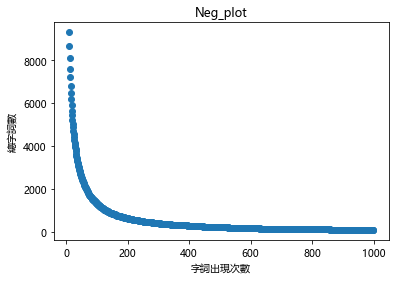

In [32]:
# Plot the key word num
num = []
i_num = []
for i in range(10,1000):
    i_num.append(i)
    num.append(Neg_count.loc[Neg_count[0] >i].shape[0])
plt.scatter(i_num, num)
plt.title('Neg_plot')
plt.xlabel("字詞出現次數")
plt.ylabel("總字詞數")

In [68]:
# Save key word list
Neg_count.loc[Neg_count[0] > 100].to_csv('Neg_count_100.csv', encoding = 'utf8')